**Statistics**

* Talk about expectations. https://en.wikipedia.org/wiki/Expected_value
* Variance: show a distribution. Conceptually cover what variance is
* Variance: show how variance is calculated and start calculating it 
* Covariance: show covariance of 2 variables (as height goes up so does weight). Then start showing how you measure this 
* Talk about correlation and why covariance and correlation are separate things.
* Another important concept in stats is probability. 
* Show 4 different ways of saying the same probability
* Why is probability and expectation linked?

# Statistics and Probability

## Random Variables and Descriptive Statistics
A __random variable__ is defined as a variable whose values depend on outcomes of random events. For example, when we carry out an experiment, we never get exactly the same result twice, maybe due to some measurement errors or some flaws in the system we are using to measure. But what is __randomness__? 

Some argue that this variation is not random and simply due to high-complexity processes that we are in no place of following accurately. For example, Robert Brown, a famous physicist, saw that pollen particles in water seem to bounce around randomly by bouncing about the water molecules. Some would argue that this was not random, and that if we knew where __all__ water molecules were and where they were going at all times, we could predict exactly where they would be later on. However, this is impossible to do in practice, and there was far more success when treating these as random forces!

How do we generate a random value? We can use in-built functions, such as the ones from the __random__ and __numpy__ modules to generate random values. Numpy comes with the added functionality of creating vectors and matrices of random values in one line.

In [1]:
import random
import numpy as np

# Generating randomness with random!
random_number = random.randint(0,4) # random integer between 0 and 4
random_number2 = random.random() # random floating point value between 0 and 1
print("random module:", random_number, random_number2)

# Generating randomness with numpy!
random_number = np.random.uniform(0,4) # random value from uniform distribution between 0 and 4
random_number2 = np.random.normal(0,1) # random value from standard normal distribution
print("numpy module:",random_number, random_number2)

print()

# Generating a random vector and matrix
random_vector = np.random.normal(0,1,5) # 1x5 vector from standard normal distribution
random_matrix = np.random.uniform(0,4,(2,2)) # 2x2 matrixrandom values from uniform distribution between 0 and 4
print(random_vector)
print(random_matrix)

random module: 0 0.541896623581504
numpy module: 2.8964849987743873 1.5063666029473686

[-1.0967999  -0.78068744 -0.95545494 -1.08712725 -0.40973687]
[[3.62014241 0.88149704]
 [3.43737303 3.61277259]]


An __experiment__ is a process whose outcome is uncertain, with all possible outcomes being its __sample space__. So in __descriptive statistics__, when we want measure a quantity, we can treat the quantity as a random variable. For example, let us consider the length of foxes in the UK. We know that there are scientific justfications for different foxes having different lengths, but if we treat fox height as a random variable and consider all differences to be random, we can extract very useful information, such as __how much the population varies, what is the most frequent height or what value is the most representative of this population__.

A __population__ is described as a well-defined collection of objects we are interested in and a __sample__ is a subset of this population that we can get data from. We normally only have access to information from a sample of an entire population, and we use this data to estimate the properties of the population itself. Some of the simplest properties, are given in the equations below:

$$ \bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_{i}$$
$$ s^{2} = \frac{1}{n-1}\sum_{i=1}^{n}(x_{i}-\bar{x})^{2}$$
Where $\bar{x}$ is the __sample mean__, s is the __sample standard deviation__ and $s^{2}$ the __sample variance__. These are __estimates__ of the population mean($\mu$), standard deviation($\sigma$) and variance($\sigma^{2}$). The population mean, also known as __expected value__, is the value that is the most representative of the population. Another way to look at it is that given the sample size of n, __the expected value is the unique value that if you add it to itself n times, it is the same as the sum of all your samples__. By analysing the variance equation, we can see that the variance is the expected value of the square of the difference between the samples and the mean. Intuitively, this means that variace is a measure of the spread of the data. 

Let us consider the example of fox length with the given data below:

In [2]:
# Rounds to a given decimal place
def round_dp(number, decimalplaces):
    factor = 10**decimalplaces
    return round(number*factor)/factor
    

# UK fox heights(m)
fox_lengths = [0.6,0.65,0.7,0.62,0.75,0.79,0.72,0.63,0.65,0.59] # sample size = 10

# Calculating mean
sample_mean = 0
for sample in fox_lengths:
    sample_mean += sample
sample_mean = sample_mean/len(fox_lengths)

#Calculating variance
sample_variance = 0
for sample in fox_lengths:
    sample_variance = sample_variance + (sample - sample_mean)**2
sample_variance = sample_variance/(len(fox_lengths)-1)

print("Pure Python: mean =",round_dp(sample_mean,4),", variance =",round_dp(sample_variance,4))

# Calculating mean and variance in numpy
fox_lengths = np.array(fox_lengths)
sample_mean = np.mean(fox_lengths)
sample_variance = np.var(fox_lengths,ddof=1)

print("Numpy: mean =",round_dp(sample_mean,4),", variance =",round_dp(sample_variance,4))

Pure Python: mean = 0.67 , variance = 0.0045
Numpy: mean = 0.67 , variance = 0.0045


The results above show that the the average fox length is 67cm and the length variance is 0.45cm. How can we interpret these results? What if I ask you, given these quantities, what is more likely: to find a fox with a length of 65 centimetres or one with the length of 5 metres? I think most people would agree that 65cm is far more likely, since it's closer to the sample mean and the variance of the population isn't large enough to lead to such large difference in length! 

So while we cannot predict what the exact length of a random fox we find in the wild, we can determine what heights are __more likely__ than others. But how do we quantify ___how likely___ a value is to take place?


##  Introduction to Probability
__Probability__ is a measure of how likely an outcome is to occur given all other possible outcomes and the given circumstances. Therefore, when dealing with random variables, we do not concern ourselves with __what will happen__, but instead with __the probability of given outcome(s), also known as events, occuring__. Probability is formally defined as:

$$ \text{Probability of an outcome} = \frac{\text{Number of wanted outcomes}}{\text{Number of possible outcomes}} $$

Intuitively, we know that the probability of something occurring has to be somewhere between 0, where the outcome _cannot_ occur, and 1, where the outcome _will_ occur. Given the events A and B, we can also define $P(A\cup B)$ as the probability of ___either___ A or B taking place and $P(A\cap B)$ as the probability of ___both___ A and B taking place. In terms of digital logic, __union__( $\cap$ ) corresponds to the __or__ operator and __intersection__( $\cup$ ) to the __and__ operator. Using these, we can define key properties of probability theory: 

$$1. P(A) = 1-P(A') $$
$$2. \sum_{i=1}^{N}P(A_{i}) = 1$$
$$3. P(A\cup B) = P(A) + P(B) - P(A\cap B)$$

A' is the __complement__ of A, and represents all events that are not included in A. The complement behaves like the __not__ operator, meaning the first property implies that the probability of an event taking place is equal to 1 minus the probability of the event __NOT__ taking place. If the probability of raining tomorrow is 0.8, then the probability that it will NOT rain tomorrow is 1 - 0.8 = 0.2. The second property implies that the sum of the probability of any of the possible events must equal to 1. This makes sense, since out of all possible outcomes, at least one must take place. For example, there is a probability of 1 that it will either rain or not tomorrow, and there is a probability of 1 that the length of a fox we find in the wild will be between 0 and infinity! The third property shows that the probability of events A or B occuring is given by the sum of the probability of A with the probability of B, subtracted by the probability of both events taking place. This is because the by adding the two individual probabilities, the intersection between them is accounted for twice. If two events A and B cannot occur simultaneously, they are known as __mutually exclusive__

## Conditional Probability
While quantities are random, probabilities are the measure of the likelihood of an event occuring. Under different circumstances, things may become more or less likely to happen. Given that it is sunny now, the probability of raining soon is smaller than if it was cloudy. This leads to the field of __conditional probability__, which is the probability of an event taking place ___given___ another event has occured. If we consider $P(A|B)$ to represent the probability of A occuring _given_ B has occured, we can define it with the equation below.

$$P(A|B) = \frac{P(A\cap B)}{P(B)}$$

While there is no formal proof for the equation above, we can make intuitive sense of it. There is a probability associated with the uncertainty of whether B occurs or not. So if we assume that A is __dependent__ on B, meaning the probability of A differs depending on whether B does or does not take place, knowing that B has already happened removes some uncertainty from whether A and B will occur propertional to how likely B was to occur in the first place.

For example, let's say that I'm a birdwatcher following a rare yellow flamingo. My goal is to find the flamingo, and take a picture of him that we can publish on the _BirdsBirdsBirds Weekly_ magazine. For my success, both the event of finding it and getting a good picture need to take place. However, if I have already found the yellow flamingo, the probability of getting a good picture that day increases proportionally to how hard it was to find it in the first place!

We can also establish the __law of total probability__, which is given by:

$$P(B) = \sum_{i=1}^{N}P(B|A_{i})P(A_{i}) $$

Where N is the total number of prior outcomes, $A_{i}$ is the $i^{th}$ possible outcome prior to B, where all of the prior events are mutually exclusive (cannot both occur at the same time). If we analyse the equation more closely, we can see that the sum of the probabilities of $A_{i}$ and B both occuring for all possible prior events $A_{i}$ are the individual components that make up the probability of B taking place. 

For example, let's assume that if I don't find a flamingo, I can still get a picture of one from one of my sources. The probability of me getting a picture of a yellow flamingo is just the sum of the probability of _finding_ a flamingo and getting a picture and _not finding_ a flamingo and getting a picture.

The law of total probability enables us to derive another incredibly useful theorem, known as __Bayes' Theorem__, which is used for revising predictions (updating probabilities) given additional evidence. Bayes Theorem is given as follows:

$$P(A_{j}|B) = \frac{P(A_{j}\cap B)}{P(B)} = \frac{P(B\cap A_{j})}{P(B)} =  \frac{P(B|A_{j})P(A_{j})}{\sum_{i=1}^{N}P(B|A_{i})P(A_{i})} $$

This equation dictates that the probability of that the prior outcome $A_{j}$ has taken place given that the event B has now taken place is given by the ratio between the probability that $A_{j}$ and B occured and the probability that B followed any possible event $A_{i}$.

We will now look at a quick example to understand these concepts in practice, shown in the __tree diagram__ below, with the properties:
- Imagine a type of bolt that can be produced either in factory A or factory B. They sometimes end up defective.
- 60% of bolts are produced in A and 40% of bolts are produced in B
- 2% of bolts produced in A are defective and 4% of bolts produced in B are defective

<img src="tree.png" alt="tree-diagram"
	title="Tree diagram of the bolt production process" width="750px" height="500px" />
    
Given the diagram above and the process, we can answer the following questions:
1. What is the probability that the bolt is from factory A and it is defective? <br>
$P(A\cap D) = P(D|A)P(A) = 0.02\cdot 0.6 = 0.012 $
2. Using the law of total probability, what is the probability that a bolt is defective? <br>
$P(D) = \sum_{i=1}^{N}P(D|A_{i})P(A_{i}) = P(D|A)P(A) + P(D|B)P(B) = 0.02\cdot 0.6 + 0.04\cdot 0.4 = 0.028 $
3. Using Bayes Theorem, what is the probability that a bolt is from factory B, given that it is defective? <br>
$P(B|D) = \frac{P(D|B)P(B)}{\sum_{i=1}^{N}P(D|A_{i})P(A_{i})} = \frac{0.04\cdot 0.4}{0.04\cdot 0.4 + 0.02\cdot 0.6} = 0.57$
4. Using Bayes Theorem, what is the probability that a bolt is from factory A, given that it is defective? <br>
$P(A|D) = \frac{P(D|A)P(A)}{\sum_{i=1}^{N}P(D|A_{i})P(A_{i})} = \frac{0.02\cdot 0.6}{0.04\cdot 0.4 + 0.02\cdot 0.6} = 0.43$

So with the laws of probability we've gone over, we were able to calculate the probability that a bolt is defective no matter where it came from originally and even what factories are responsible for the majority of the defective bolts, which in this case is factory B!

Lastly, if the occurance of an event does not affect the probability of another, meaning for instance $P(A|B) = P(A)$, A and B are __independent events__. If I eat a croissant for breakfast today, this will not affect the probability of it raining in two weeks time. Given the above equation, we can conclude that for independent events A and B:
$$P(A \cap B) = P(A)P(B)$$


## Probability Distributions
As some of you may have noticed, not all random variables are the same. Some variables are __discrete__, whereas other variables are __continuous__. Discrete variables can be counted in either a finite sequence or in an infinite sequence with a first term, second term, third term... and so on. Continuous variables cannot be counted. For instance, if we are rolling a fair dice, and treat the number of '2's that land in 3 rolls as a random variable, we will have a finite number of outcomes. We can have 0,1,2 or 3 '2's, but we cannot roll 1.5  '2's, meaning this is a _discrete_ random variable! When we dealt with fox length as a random variable, a fox can have a length of 67cm, 66.9cm, 66.99cm, 66.999cm, 66.9999cm ... there is an infinite number of possibilities between any two possible lengths, making fox length a _continuous_ random variable.

A __probability distribution__ of a random variable dictates how the total probability of 1 is allocated between all possible outcomes. Therefore, we use similar, yet not identical tools of analysis when dealing with discrete and continuous random variables.

### Discrete Probability Distributions
For a given random variable, X, we represent the probability of an outcome, x occuring as __P(X=x)__, and as stated above, each possible outcome is allocated a probability. Let us create a probability distribution for the example given above, of the number of '2's that occur in 3 rolls, denoted by N. If we assume we have a fair die, the probability of landing any number is simply $\frac{1}{6}$. If we further assume that the outcome of each roll is independent of each other and denote the probability of an outcome of the dice with the random variable X:
- The probability of landing only '2's is given by $P(N=3) = (P(X=2))^{3}=\frac{1}{6^{3}} = \frac{1}{216}$.
- The probability of landing two '2's is given by $P(N=2) = 3P(X=2)^{2}(1-P(X=2)) =3\cdot \frac{1}{6^{2}}\cdot \frac{5}{6} = \frac{15}{216}$
- The probability of landing one '2' is given by $P(N=1) = 3P(X=2)(1-P(X=2))^{2}= 3\cdot \frac{1}{6}\cdot (\frac{5}{6})^{2} =  \frac{75}{216}$
- The probability of landing zero '2' is given by $P(N=0) = (1-P(X=2))^{3} = \frac{125}{216}$

We now have a discrete probability distribution describing the random variable we created:
- All possible values our random variable can take were assigned a probability
- Their probabilities combined add up to 1

Congratulations, you have successfully created your own probability distribution! There are multiple discrete probability distributions that can be used in different contexts, such as __Bernoulli, Poisson, Binomial

### Continuous Probability Distributions
Mathematically, continuous distributions differ from discrete distributions. For instance, no matter the range our random variables are bounded by, we will always have infinite possible values it can take, meaning the sum of their probabilities will always be infinity, which really doesn't make sense! __Instead, rather than the probability of  taking individual values, we consider the probability of a the random variable being within a given range of values.__ For example, in the case of the length of foxes in the UK, there is no way we can calculate the probability of a random fox having a given exact length. However, we can most definitely calculate the probability of a random fox have a length within a range we choose. 

In fact, these distributions become interesting because different ranges at different locations will have different probabilities. For example, if I pick a random fox, whose _expected_ length is 0.67m, the probability of its length being in the range 0.6m-0.7m will intuitively be far more likely than the probability of its length being in the range 2.0m-2.1m. Hence, for continuous variables, we use a __probability density function (PDF)__, denoted as __p(x)__ as a distribution. The density term is analogous to what density means in physics: it describes the amount of probability per length of a range the random variable can take. Given the PDF, we can calculate the probability of the random variable being within a given range with the following:
$$P(a\geq x \geq b) = \int_{a}^{b}p(x)dx$$
Which is the __integral from x=a to x=b of the function p(x)__, which is equivalent to the __area underneath the curve within that range__. We will cover more on integrals in the _Optimiser_ section of the course.

Arguably the simplest continuous distribution is the __uniform distribution__, where for a given range, all values the random variable can take have the same _probability density,_ and outside this range the probability density is 0. If we consider a uniform distribution between 0 and 1, it probability density is given by:
$$ p(x) =  \begin{cases} 
      1, &  0 \geq x \geq 1 \\
      0, &  \text{otherwise}
   \end{cases}
$$
### ENTER 2 GRAPHS, 1 THAT JUST SHOWS THE DISTRIBUTION, AND ANOTHER THAT SHOWS THE GRAPH WITH THE AREA WITHIN THE RANGE 0.2-0.4 SHADED, SIDE-BY-SIDE

From the images, we can intuitively see that the area underneath the curve can be calculated as the area of a rectangle. From this, we can see that the area of the square formed by the non-zero values of the distribution is 1, which meets the criteria of a probability distribution! From the shaded graph of the distribution, we can calculate the probability of x being within the range 0.2-0.4 as the area underneath the rectangle of height = 1 and base = 0.2:
$$P(0.2\geq x \geq 0.4) = 1\cdot 0.2 = 0.2$$


## Expected Value, Variance and Probability Distribution
We have seen before that that the expected or mean value and variance can be computed given a number of samples in the dataset, but how does that relate to probability distributions? Well, if we know the probability distribution of a random variable, we know how likely every sample is to take a particular value. We can go as far as to _generate_ our own "random" data, as shown below for the throw of a fair dice:

In [3]:
# Generating random data for the throw of a random dice
dice_roll = np.random.randint(1,7) # a random integer from 1 to 6
print(dice_roll)

3


In fact, if we generate samples from a probability distribution, we see that if a large enough number of samples is generated, the probability of each outcome can be estimated from the data. Below, we generate 1000 dice rolls, and calculate the probability of each outcome taking place.

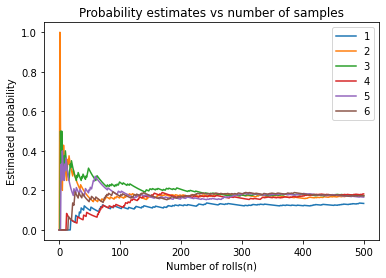

Expected value:  3.588


In [4]:
import matplotlib.pyplot as plt

# Estimated probability distribution

dice_rolls = np.random.randint(1,7,500) # generates 500 dice rolls
probability_tracker = np.zeros((1,6)) # probabilities at 0th step
outcomes = np.zeros(6)# will keep current number of outcomes

# Computing the evolution of the probability of the dice rolls
for idx,roll in enumerate(dice_rolls):
    outcomes[roll-1] += 1 # increase the number of the times this outcome occurred
    probability_tracker = np.append(probability_tracker,outcomes/np.sum(outcomes))

roll_number = np.linspace(0,500,501) # number of dice rolled
probability_tracker = np.reshape(probability_tracker,(501,6))

# Plotting how our probabilities changed over the number of rolls
plt.figure()
for i in range(6):
    prob = probability_tracker[:,i]
    plt.plot(roll_number,prob)
plt.ylabel('Estimated probability')
plt.xlabel('Number of rolls(n)')
plt.title('Probability estimates vs number of samples')
plt.legend(('1','2','3','4','5','6'))
plt.show()

mean = np.mean(dice_rolls)
print("Expected value: ",mean)

For now, do not worry about the code itself. In this case, we see that if we take samples that we _assume_ follow a probability distribution, the estimate of the probability of each possible outcome becomes more accurate as the number of samples increase!  

From the calculation of the probability, we can see that it is equivalent to the ratio of the number of times an outcome occurred relative to the total number of outcomes. This means that __the probability of an outcome is the weight of its contribution to the expected value of the random variable.__ Likewise, the more samples we have to calculate this, the more the probabilities approach the __true__ probability distribution. Given this relationship, we can actually calculate the expected value of any random value given its probability distribution:

$$ \text{Discrete Case: } \mu = E(X) = \sum_{x \in X}xP(x)$$
$$ \text{Continuous Case: }\mu = E(X) = \int_{-\infty}^{\infty}xp(x)dx$$

Where E(.) is known as the __expectation operator__, returns the expected value of the random variable we apply it to.

As the integral in the continuous case is the equivalent of the sum in the discrete case, the probability density acts as a weight of the contribution of each point in the integral. Similarly, these probabilities and probability densities act as weights to determine the __true variance__, given by the equations below:

$$ \text{Discrete Case: } \sigma^{2} = Var(X) = \sum_{x \in X}(x-\mu)^{2}P(x)$$
$$ \text{Continuous Case: }\sigma^{2} = Var(X) = \int_{-\infty}^{\infty}(x-\mu)^{2}p(x)dx$$

To consolidate these, let's go back to our example of rolling a dice three times and treating the number of '2's as a random variable (N). Since we have already constructed the probability distribution, we can compute the expected value and variance with the equation above!

$$E(N) =  \sum_{n \in N}nP(N) = 0\cdot \frac{125}{216} + 1\cdot \frac{75}{216} + 2\cdot \frac{15}{216} + 3\cdot \frac{1}{216} = 0.5$$
$$Var(N) = \sum_{n \in N}(n-\mu)^{2}P(N=n) = (0-0.5)^{2}\cdot \frac{125}{216} + (1-0.5)^{2}\cdot \frac{75}{216} + (2-0.5)^{2}\cdot \frac{15}{216} + (3-0.5)^{2}\cdot \frac{1}{216} = 0.417$$

## Estimation: Variance and Bias
In a field known as _estimation theory,_ an __estimator__ is a function of the dataset we can then use to generate an __estimate__. For example, the _sample mean_ and _sample variance_ we saw before are examples of estimators. In fact, they are a subclass known as __unbiased estimators__, meaning that after a sufficiently large number of samples, the __bias__ becomes zero. Bias is defined as the difference between the expected value of the estimate and the true value which we aim to estimate:
$$Bias = E(\hat{\theta}) - \theta$$

Let us look at the example where we already have the probability distribution of: the number of '2's we land after rolling a dice three times. We have calculated the mean and variance to be 0.5 and 0.417 respectively. Let us analyse the evolution over the number of rolls of the both these estimates.

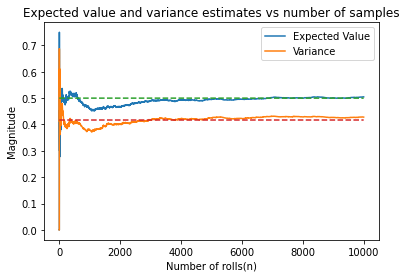

In [5]:
# Analysing evolution of sample mean and sample variance
dice_rolls = np.random.randint(1,7,(10000,3)) # generates 10000 trials of 3 dice rolls
two_tracker = np.zeros(1) # will track number of two's rolled for each trial
mean_tracker = np.zeros(1)
var_tracker = np.zeros(1)

for trial in dice_rolls: # for each trial
    two_count = 0
    for roll in trial: # for each roll of the given trial
        if roll == 2:
            two_count+=1 # if a two was rolled
    two_tracker = np.append(two_tracker,two_count) # keeping track of current number of '2's
    mean_tracker = np.append(mean_tracker,np.mean(two_tracker)) # adding new mean
    var_tracker = np.append(var_tracker,np.var(two_tracker)) # adding new variance

roll_count = np.linspace(0,10000,10001)
true_mean = np.ones(10001)*0.5
true_var = np.ones(10001)*0.417

plt.figure()
# Plotting estimates
plt.plot(roll_count,mean_tracker)
plt.plot(roll_count,var_tracker)
# Plotting theoretical quantities
plt.plot(roll_count,true_mean,'--')
plt.plot(roll_count,true_var,'--')
plt.ylabel('Magnitude')
plt.xlabel('Number of rolls(n)')
plt.title('Expected value and variance estimates vs number of samples')
plt.legend(('Expected Value','Variance'))
plt.show()


As predicted, after a large number of samples, the our estimates get closer and closer to their true value! When an estimator or model that is used to generate estimates shows _bias,_ even the best possible parametrisation is not optimal. When the variance of different parametrisations is high, there is a risk of over-accomodating our dataset, taking away from our estimator the ability to estimate unknown quantities. Generally, there is a trade-off between bias and variance, which will be dealt with in more detail later on in the course.


## Covariance and Correlation
We have now looked at the _variance_ of a given random variable. What if now we would like to see how two random variables, let's say X and Y, vary with respect to each other? In this case, we consider these in something called a __joint probability distribution,__ and we represent it with the given notation:

$$p(x,y) = P(X=x \cap Y=y)$$

Now, rather than considering the probability of variable taking place, we can consider the probability of two variables, each taking a specific value. This allows us to investigate how one variable relates to another. For example, let us consider an example where we consider a variable X, representing whether a person is amazing at Python, and another variable, Y,   representing whether a person has taken this course. Obviously there are people out there who are amazing at Python who didn't need this course, but we intuitively expect the probability of a person taking this course and being amazing at Python higher than a person who did not take this course!

For measuring how one variable varies with another, we can use the measure known as __covariance__, given by the equations below:

$$ \text{General case:  }Cov(X,Y) = E[(X-\mu_{x})(Y-\mu_{y})]$$
$$ \text{Discrete case:  } Cov(X,Y) = \sum_{x}\sum_{y}(x-\mu_{x})(y-\mu_{y})p(x,y)$$
$$ \text{Continuous case:  } Cov(X,Y) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(x-\mu_{x})(y-\mu_{y})p(x,y)dydx$$

How does this help us figure out how one random variable relates to another? Let us consider the graph below which shows different combinations of possible values the variables can take.

<img src="covariance.png" alt="covariance-diagram"
	title="Covariance diagram" width="750px" height="500px" />

In the image above, the small blue points represent individual sample pairs, and the large blue point represents the point $(\mu_{x},\mu_{y})$. By analysing the four separate quadrants we see, in general:
- If X-\mu_{x} and Y-mu_{y} are of opposite signs, the sample pair gives a __negative contribution__
- If X-\mu_{x} and Y-mu_{y} are of equal signs, the sample pair gives a __positive contribution__
- If X-\mu_{x} and/or Y-mu_{y} are relatively small, the sample pair gives a proportionally small contribution
Therefore, from the diagram above, we can see that if we get mainly pairs of opposite signs, we will get a __negative trend__, if mainly pairs of the same sign, we will get a __positive trend__ and if there is no clear majority shown by our data, we will get __no trend__.


LETS ADD IMAGES OF NO TREND, POSITIVE TREND AND NEGATIVE TREND SCATTER PLOTS HERE!!

Okay, so now we know how the covariance works. Are we done? Can we already provide a picture of how two random variables relate? Not yet. We can now identify trends and types of trends, but how do we know strong a trend is? Some might think that we can just measure the __magnitude__ of the covariance, which might seem to make sense at first. The problem with this is that __covariance is sensitive to the scale of the data we are analysing__. Let us compute the covariance for two different datasets: one measuring the price of avocado per month over a few years and one measuring human height versus human weight.

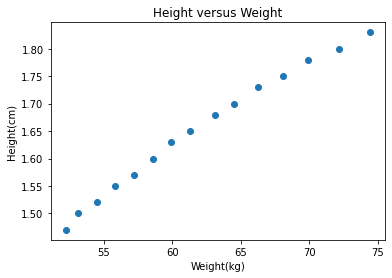

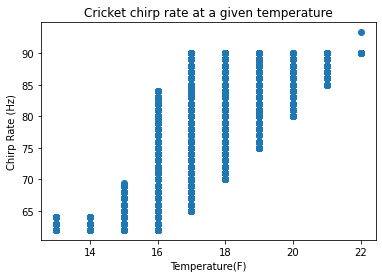

Covariance of Cricket Data:  10.8964455322547
Covariance of Height vs Weight Data 0.7462679999999999
Chirp Rate Mean:  17.258839226150766 , Chirp Rate Variance:  3.2352037226507684
Height Mean:  1.6506666666666665 , Height Variance:  0.012179555555555556


In [20]:
import pandas as pd
import datetime
    
# Importing data
height_df = pd.read_csv('height_weight_data.csv')  
cricket_df = pd.read_csv('cricket_data.csv')

# Getting data into desired variables
height = height_df["Height"]
weight = height_df["Weight"]

temperature = cricket_df["X"]
chirp_rate = cricket_df["Y"]


# Plotting avocado data
plt.figure()
plt.scatter(weight,height)
plt.xlabel("Weight(kg)")
plt.ylabel("Height(cm)")
plt.title("Height versus Weight")
plt.show()

# Plotting height vs weight data
plt.figure()
plt.scatter(chirp_rate,temperature)
plt.xlabel("Temperature(F)")
plt.ylabel("Chirp Rate (Hz)")
plt.title("Cricket chirp rate at a given temperature")
plt.show()


# Computing a covariance function!
def covariance(X,Y):
    mu_x = np.mean(X)
    mu_y = np.mean(Y)
    cov = np.mean( np.multiply(X-mu_x,Y-mu_y) ) 
    return cov

cricket_cov = covariance(chirp_rate,temperature)
height_weight_cov = covariance(height,weight)

print("Covariance of Cricket Data: ", cricket_cov)
print("Covariance of Height vs Weight Data", height_weight_cov)
print("Chirp Rate Mean: ", np.mean(chirp_rate),", Chirp Rate Variance: ", np.var(chirp_rate))
print("Height Mean: ", np.mean(height),", Height Variance: ", np.var(height))

Congratulations! we have now calculated the covariance of two different data sets. By looking at the two covariances, which one suggets a stronger positive trend? Most of you probably would guess the cricket data right? But by looking at the height vs weight data, the positive trend is much more clearly defined, so we can visibly see it has a stronger positive correlation. Why is this? It is simply to do with the scale of each dataset. If we compare both datasets, the variance of the chirp rate is approximately 300 times larger than that of the height variance, meaning the cricket data will generate a larger covariance simply due to the range of values it can take. So how do we tackle this? We normalize the covariance by the standard deviation of both random variables to obtain the __correlation coefficient($\rho_{X,Y}$)__.

$$ \rho_{X,Y} = \frac{\text{Cov(X,Y)}}{\sigma_{x}\sigma_{y}}$$

This new measure of a trend in a datast is scale-invariant, meaning that it doesn't matter how large or small the quantity we are measuring is, its correlation coefficient will always be in the range $-1 \geq \rho_{X,Y} \geq 1$, where -1 represents a perfect negative correlation and +1 represents a perfect positive correlation. Let us now compute the correlation coefficient for the cricket data and height vs weight data to see which one shows a stronger _correlation_.

In [21]:
def correlation_coefficient(covariance,sigma_x,sigma_y):
    return covariance/(sigma_x*sigma_y)

cricket_corr = correlation_coefficient(cricket_cov,np.std(chirp_rate),np.std(temperature))
height_weight_corr = correlation_coefficient(height_weight_cov,np.std(height),np.std(weight))
print("Correlation Coefficient of Cricket Data: ", cricket_corr)
print("Correlation Coefficient of Height vs Weight Data: ", height_weight_corr)

Correlation Coefficient of Cricket Data:  0.7294475838413135
Correlation Coefficient of Height vs Weight Data:  0.9945837935768896


As we see above, even though the _covariance_ of the cricked data was much larger than that of the height vs weight data, the _correlation coefficient_ calculation shows that the height vs weight data shows a most stronger positive correlation!

So now we know how to measure how strong the correlation is for a given dataset. But how do we know the correlation we determined is actually __statistically significant__. After all, we have been dealing with randomness and probabilities so how do we know that the correlation coefficient we got is representative of the data itself or just random variations in the data? To determine this we use what is known as a __p-value__, which is the probability that our result was obtained if in fact, the true correlation coefficient is 0. Generally, we say that the correlation is statistically significant if p<0.05 (95% confidence), but this can vary depending on how sensitive the answer must be. Below, we use an in-built function from the  ___stats___ module.

In [23]:
from scipy.stats import pearsonr
# correlation coefficients and p-values
cricket_corr,p_cricket = pearsonr(chirp_rate, temperature)
hw_corr, p_height_weight = pearsonr(height, weight)

print("Cricket Data: correlation coefficient = ",cricket_corr, ", p-value = ",p_cricket)
print("Height vs Weight Data: correlation coefficient = ",hw_corr, ", p-value = ",p_height_weight)

Cricket Data: correlation coefficient =  0.7294475838413137 , p-value =  3.671854111541991e-249
Height vs Weight Data: correlation coefficient =  0.9945837935768895 , p-value =  3.603515339548666e-14


Since the p-values of both datasets are smaller than 0.05, both correlations show statistical significance!!